# Testing and Comparing Different Methods

First let's import the necessary libraries and implementations for the methods.

In [3]:
!pip3 install numpy

In [4]:
!pip3 install matplotlib

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import source_code as sc
from source_code import eigenvalues_characteristic_polynomial_method, eigenvalue_power_method, eigenvalues_QR_algorithm

We will now proceed to test all the matrices using each of the methods and compare the results. Specifically, we will evaluate the number of iterations required by each method and compare the eigenvalues they produce against the results obtained from NumPy.

In [7]:
def compare_with_numpy(matrix, initial_guess,tol=1e-6):
    """
    Compares eigenvalues and eigenvectors from different methods with NumPy's results and calculates the error.

    Args:
        matrix (list[list[float]] or np.ndarray): The matrix for which eigenvalues and eigenvectors are computed.
        tol (float): Tolerance for comparison.

    Returns:
        dict: A dictionary containing the eigenvalues and eigenvectors from each method,
              NumPy's results, and the errors for each method.
    """
    results = {}
    
    # Convert the matrix to a numpy array if it's not already
    matrix = np.array(matrix, dtype=float)
    np_eigenvalues_M = np.linalg.eigvals(matrix)
    real_eigenvalues_M = sorted(np_eigenvalues_M[np.isreal(np_eigenvalues_M)].real)
    np_eigenvalues, np_eigenvectors = np.linalg.eig(matrix)
    real_np_eigenvalues = sorted(np_eigenvalues[np.isreal(np_eigenvalues)].real)
    np_eigenvectors = np.array([np_eigenvectors[:, i] for i in range(len(np_eigenvalues))])
    results["numpy"] = {"eigenvalues": real_np_eigenvalues, "eigenvectors": np_eigenvectors}

    # Characteristic Polynomial Method
    eigenvalues_poly = eigenvalues_characteristic_polynomial_method(matrix, show=False)
    poly_error = [abs(a - b) for a, b in zip(eigenvalues_poly, real_np_eigenvalues)]
    results["characteristic_polynomial"] = {
        "eigenvalues": eigenvalues_poly,
        "errors": poly_error,
        "within_tolerance": all(e <= tol for e in poly_error)
    }

    # QR Algorithm
    eigenvalues_M, qr_iterations = eigenvalues_QR_algorithm(matrix)
    qr_error = []
    for my_eigenvalue, np_eigenvalue in zip(eigenvalues_M, real_np_eigenvalues):
        qr_error.append(abs(my_eigenvalue - np_eigenvalue))
    
    results["qr_algorithm"] = {
        "eigenvalues": eigenvalues_M,
        "errors": qr_error,
        "within_tolerance": all(e <= tol for e in qr_error),
        "iterations": qr_iterations
    }

    # Power Method 
    dominant_eigenvalue, dominant_eigenvector, power_iterations = eigenvalue_power_method(matrix, initial_guess)
    dominant_error = abs(dominant_eigenvalue - max(real_np_eigenvalues))
    numpy_dominant_eigenvector = np_eigenvectors[np.argmax(real_np_eigenvalues)]
    results["power_method"] = {
        "dominant_eigenvalue": dominant_eigenvalue,
        "eigenvector": dominant_eigenvector,
        "error": dominant_error,
        "within_tolerance": dominant_error <= tol,
        "iterations": power_iterations
    }

    # Results
    print("Eigenvalue and Eigenvector Comparison\n")
    print("NumPy Results:")
    print(f"Eigenvalues: {real_np_eigenvalues}")
    print("Eigenvectors:")
    for vec in np_eigenvectors:
        print(vec)
    print("\n")

    print("Characteristic Polynomial Method:")
    print(f"  Eigenvalues: {eigenvalues_poly}")
    print(f"  Errors: {poly_error}")
    print(f"  Within Tolerance: {results['characteristic_polynomial']['within_tolerance']}\n")

    print("Power Method:")
    print(f"  Dominant Eigenvalue: {dominant_eigenvalue}")
    print(f"  Error: {dominant_error}")
    print(f"  Eigenvector: {dominant_eigenvector}")
    print(f"  Iterations: {power_iterations}")
    print(f"  Within Tolerance: {results['power_method']['within_tolerance']}\n")
    
    print("QR Algorithm:")
    print(f"  Eigenvalues: {eigenvalues_M}")
    print(f"  Errors: {qr_error}")
    print(f"  Iterations: {qr_iterations}")
    print(f"  Within Tolerance: {results['qr_algorithm']['within_tolerance']}\n")
    
    return results

## Test for Matrix A

$ A = \begin{bmatrix} 2 & 1 \\ 3 & 4 \end{bmatrix} $


In [9]:
tol = 1e-6
A = np.array([[2, 1], [3, 4]])
x0 = [1] * 2 # Initial aproximation for Power Method
results_A = compare_with_numpy(A, x0, tol)

Eigenvalue and Eigenvector Comparison

NumPy Results:
Eigenvalues: [1.0, 5.0]
Eigenvectors:
[-0.70710678  0.70710678]
[-0.31622777 -0.9486833 ]


Characteristic Polynomial Method:
  Eigenvalues: [1.0, 5.0]
  Errors: [0.0, 0.0]
  Within Tolerance: True

Power Method:
  Dominant Eigenvalue: 5.000000003276801
  Error: 3.276801052720657e-09
  Eigenvector: [0.31622777 0.9486833 ]
  Iterations: 12
  Within Tolerance: True

QR Algorithm:
  Eigenvalues: [0.9999999999999998, 4.999999999999999]
  Errors: [2.220446049250313e-16, 8.881784197001252e-16]
  Iterations: 465
  Within Tolerance: True



## Test for Matrix B

$ B = \begin{bmatrix} 3 & 2 \\ 3 & 4 \end{bmatrix} $

In [11]:
tol = 1e-6
B = np.array([[3, 2], [3, 4]])
x0 = [1] * 2
results_B = compare_with_numpy(B, x0, tol)

Eigenvalue and Eigenvector Comparison

NumPy Results:
Eigenvalues: [1.0, 6.0]
Eigenvectors:
[-0.70710678  0.70710678]
[-0.5547002  -0.83205029]


Characteristic Polynomial Method:
  Eigenvalues: [1.0, 6.0]
  Errors: [0.0, 0.0]
  Within Tolerance: True

Power Method:
  Dominant Eigenvalue: 6.000000000530068
  Error: 5.300684335907135e-10
  Eigenvector: [0.5547002  0.83205029]
  Iterations: 11
  Within Tolerance: True

QR Algorithm:
  Eigenvalues: [1.0000000000000002, 5.999999999999998]
  Errors: [2.220446049250313e-16, 1.7763568394002505e-15]
  Iterations: 418
  Within Tolerance: True



## Test for Matrix C

$ C = \begin{bmatrix} 2 & 3 \\ 1 & 4 \end{bmatrix} $

In [13]:
tol = 1e-6
C = np.array([[2, 3], [1, 4]])
x0 = [1] * 2
results_C = compare_with_numpy(C, x0, tol)

Eigenvalue and Eigenvector Comparison

NumPy Results:
Eigenvalues: [1.0, 5.0]
Eigenvectors:
[-0.9486833   0.31622777]
[-0.70710678 -0.70710678]


Characteristic Polynomial Method:
  Eigenvalues: [1.0, 5.0]
  Errors: [0.0, 0.0]
  Within Tolerance: True

Power Method:
  Dominant Eigenvalue: 4.999999999999999
  Error: 8.881784197001252e-16
  Eigenvector: [0.70710678 0.70710678]
  Iterations: 1
  Within Tolerance: True

QR Algorithm:
  Eigenvalues: [1.0000000000000002, 5.0]
  Errors: [2.220446049250313e-16, 0.0]
  Iterations: 465
  Within Tolerance: True



## Test for Matrix D

$ D = \begin{bmatrix} 1 & 1 & 2 \\ 2 & 1 & 1 \\ 1 & 1 & 3 \end{bmatrix} $


In [15]:
tol = 1e-6
D = np.array([[1, 1, 2], [2, 1, 1], [1, 1, 3]])
x0 = [1] * 3
results_D = compare_with_numpy(D, x0, tol)

Eigenvalue and Eigenvector Comparison

NumPy Results:
Eigenvalues: [-0.28514248182978513, 0.778123837736809, 4.507018644092973]
Eigenvectors:
[-0.53231709 -0.49863934 -0.6841033 ]
[-0.49762292  0.86033768 -0.11041066]
[-0.1297142  -0.88103974  0.45491011]


Characteristic Polynomial Method:
  Eigenvalues: [-0.2851424818297853, 0.7781238377368097, 4.507018644092973]
  Errors: [1.6653345369377348e-16, 6.661338147750939e-16, 0.0]
  Within Tolerance: True

Power Method:
  Dominant Eigenvalue: 4.507018643489628
  Error: 6.033449295728133e-10
  Eigenvector: [0.53231709 0.49863934 0.6841033 ]
  Iterations: 11
  Within Tolerance: True

QR Algorithm:
  Eigenvalues: [-0.28514248182978574, 0.7781238377368092, 4.507018644092973]
  Errors: [6.106226635438361e-16, 1.1102230246251565e-16, 0.0]
  Iterations: 1000
  Within Tolerance: True



## Test for Matrix E

$ E = \begin{bmatrix} 1 & 1 & 2 \\ 2 & 1 & 3 \\ 1 & 1 & 1 \end{bmatrix} $


In [17]:
tol = 1e-6
E = np.array([[1, 1, 2], [2, 1, 3], [1, 1, 1]])
x0 = [1] * 3
results_E = compare_with_numpy(E, x0, tol)

Eigenvalue and Eigenvector Comparison

NumPy Results:
Eigenvalues: [-0.6920214716300962, -0.3568958678922096, 4.048917339522307]
Eigenvectors:
[-0.51769363 -0.74808896 -0.41515805]
[-0.85467668  0.21108771  0.47430977]
[-0.26822309 -0.75154439  0.6026918 ]


Characteristic Polynomial Method:
  Eigenvalues: [-0.6920214716300962, -0.35689586789220934, 4.048917339522307]
  Errors: [0.0, 2.7755575615628914e-16, 0.0]
  Within Tolerance: True

Power Method:
  Dominant Eigenvalue: 4.048917337466517
  Error: 2.055789316557366e-09
  Eigenvector: [0.51769363 0.74808897 0.41515805]
  Iterations: 11
  Within Tolerance: True

QR Algorithm:
  Eigenvalues: [-0.692021471630096, -0.35689586789220923, 4.048917339522307]
  Errors: [2.220446049250313e-16, 3.885780586188048e-16, 0.0]
  Iterations: 1000
  Within Tolerance: True



## Test for Matrix F

$ F = \begin{bmatrix} 2 & 1 & 2 \\ 1 & 1 & 3 \\ 1 & 1 & 1 \end{bmatrix} $


In [19]:
tol = 1e-6
F = np.array([[2, 1, 2], [1, 1, 3], [1, 1, 1]])
x0 = [1] * 3
results_F = compare_with_numpy(F, x0, tol)

Eigenvalue and Eigenvector Comparison

NumPy Results:
Eigenvalues: [-0.7615571818318908, 0.6366717620673159, 4.12488541976457]
Eigenvectors:
[-0.67550236 -0.61159354 -0.41188579]
[-0.72653358  0.66793428  0.16128473]
[-0.07072589 -0.84969749  0.52250553]


Characteristic Polynomial Method:
  Eigenvalues: [-0.7615571818318905, 0.6366717620673163, 4.124885419764569]
  Errors: [3.3306690738754696e-16, 4.440892098500626e-16, 8.881784197001252e-16]
  Within Tolerance: True

Power Method:
  Dominant Eigenvalue: 4.12488541678222
  Error: 2.9823494784864124e-09
  Eigenvector: [0.67550236 0.61159354 0.41188579]
  Iterations: 11
  Within Tolerance: True

QR Algorithm:
  Eigenvalues: [-0.7615571818318913, 0.6366717620673171, 4.124885419764577]
  Errors: [4.440892098500626e-16, 1.2212453270876722e-15, 7.105427357601002e-15]
  Iterations: 1000
  Within Tolerance: True



## Test for Matrix G

$ G = \begin{bmatrix} 1 & 1 & 1 & 2 \\ 2 & 1 & 1 & 1 \\ 3 & 2 & 1 & 2 \\ 2 & 1 & 1 & 4 \end{bmatrix} $


In [21]:
tol = 1e-6
G = np.array([[1, 1, 1, 2], [2, 1, 1, 1], [3, 2, 1, 2], [2, 1, 1, 4]])
x0 = [1] * 4
results_G = compare_with_numpy(G, x0, tol)

Eigenvalue and Eigenvector Comparison

NumPy Results:
Eigenvalues: [-0.7356415384387965, -0.40745627013812413, 1.5085633449433244, 6.634534463633605]
Eigenvectors:
[0.38941594 0.35142164 0.55977506 0.6414904 ]
[-0.10866639 -0.54839569 -0.61625428  0.55469311]
[ 0.65148076 -0.31969406 -0.68513144 -0.06295578]
[ 0.38913343 -0.80095815  0.44482357 -0.09577685]


Characteristic Polynomial Method:
  Eigenvalues: [-0.7356415384387962, -0.4074562701381244, 1.508563344943325, 6.634534463633596]
  Errors: [3.3306690738754696e-16, 2.7755575615628914e-16, 4.440892098500626e-16, 8.881784197001252e-15]
  Within Tolerance: True

Power Method:
  Dominant Eigenvalue: 6.634534462450012
  Error: 1.1835927793413248e-09
  Eigenvector: [0.38941594 0.35142164 0.55977506 0.6414904 ]
  Iterations: 13
  Within Tolerance: True

QR Algorithm:
  Eigenvalues: [-0.7356415384387968, -0.4074562701381242, 1.5085633449433258, 6.634534463633592]
  Errors: [2.220446049250313e-16, 5.551115123125783e-17, 1.3322676295501878

## Test for Matrix H

$ H = \begin{bmatrix} 1 & 2 & 1 & 2 \\ 2 & 1 & 1 & 1 \\ 3 & 2 & 1 & 2 \\ 2 & 1 & 1 & 4 \end{bmatrix} $

In [23]:
tol = 1e-6
H = np.array([[1, 2, 1, 2], [2, 1, 1, 1], [3, 2, 1, 2], [2, 1, 1, 4]])
x0 = [1] * 4
results_H = compare_with_numpy(H, x0, tol)

Eigenvalue and Eigenvector Comparison

NumPy Results:
Eigenvalues: [-1.0879349236625622, -0.46744323473112087, 1.7281159082896422, 6.827262250104038]
Eigenvectors:
[-0.42853133 -0.34899468 -0.55406667 -0.62255421]
[-0.24289613 -0.4838935  -0.52400705  0.65746876]
[-0.71363438  0.35215497  0.598272    0.09372011]
[-0.28400892 -0.22663858  0.93115005 -0.03055296]


Characteristic Polynomial Method:
  Eigenvalues: [-1.0879349236625615, -0.46744323473112087, 1.7281159082896405, 6.8272622501040425]
  Errors: [6.661338147750939e-16, 0.0, 1.7763568394002505e-15, 4.440892098500626e-15]
  Within Tolerance: True

Power Method:
  Dominant Eigenvalue: 6.827262249416448
  Error: 6.875904290382095e-10
  Eigenvector: [0.42853133 0.34899468 0.55406667 0.62255421]
  Iterations: 14
  Within Tolerance: True

QR Algorithm:
  Eigenvalues: [-1.0879349236625606, -0.4674432347311211, 1.7281159082896402, 6.827262250104039]
  Errors: [1.5543122344752192e-15, 2.220446049250313e-16, 1.9984014443252818e-15, 8.8817

## Comparaciones

In [25]:
def how_many_iterations_take_pw_method(matrix, tol):
    x0 = [1] * len(matrix)
    dominant_eigenvalue, dominant_eigenvector, power_iterations = eigenvalue_power_method(matrix, x0, tol=tol)
    return power_iterations

def how_many_iterations_take_qr_method(matrix, tol):
    eigenvalues_M, qr_iterations = eigenvalues_QR_algorithm(matrix, tol=tol)
    return qr_iterations

def graph_comparison(matrix):
    error_thresholds = np.logspace(-3, -7, num=5)
    pw_iterations = [how_many_iterations_take_pw_method(matrix, tol) for tol in error_thresholds]
    qr_iterations = [how_many_iterations_take_qr_method(matrix, tol) for tol in error_thresholds]

    # Graph
    plt.plot(error_thresholds, pw_iterations, color="blue", label="Power Method")
    plt.plot(error_thresholds, qr_iterations, color="red", label="QR Method")
    plt.xscale('log')  # Log scale for error thresholds
    plt.xlabel('Error Threshold')
    plt.ylabel('Number of Iterations')
    plt.title('Iterations Needed for Different Error Thresholds')
    plt.legend()
    plt.grid(True)
    plt.show()

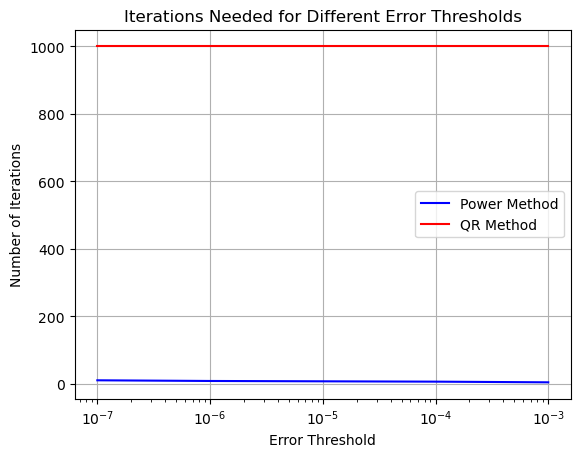

In [26]:
graph_comparison(D)

QR Method takes more iterations to stop, but if we remember the data in the test for each matrix, the accuracy of the QR method is a lot better than the power method, although both methods use the norm of the difference between vector/matrix in the current and previous iterations, it doesn't feel like a fair battle

Also Power method gives us only the information of the dominant eigenvalue, this is a disadvantage over the QR method that gives the list of all the eigenvalues

And to compare with the characteristic method equation, remember the complexity relies on calculating the determinant of a matrix, solving a system of linear equations, and find roots of a polynomial equation, because it doesnt take iterations, a way to compare them can be in how many ms it takes

In [29]:
import timeit

matrices = [A, B, C, D, E, F, G, H]
for M in matrices:
    execution_time = timeit.timeit(lambda : eigenvalues_characteristic_polynomial_method(M), number=10)
    print(execution_time * 1000, "ms")

3.3737499979906715 ms
2.185416000429541 ms
1.8464579989085905 ms
2.0472500000323635 ms
2.0408330019563437 ms
2.216832999692997 ms
3.977709002356278 ms
2.9973330019856803 ms


In [31]:
def graph_comparison_time(matrix):
    error_thresholds = np.logspace(-3, -7, num=5)
    pw_iterations = [1000 * timeit.timeit(lambda : how_many_iterations_take_pw_method(matrix, tol), number=5) for tol in error_thresholds]
    qr_iterations = [1000 * timeit.timeit(lambda : how_many_iterations_take_qr_method(matrix, tol), number=5) for tol in error_thresholds]

    # Graph
    plt.plot(error_thresholds, pw_iterations, color="blue", label="Power Method")
    plt.plot(error_thresholds, qr_iterations, color="red", label="QR Method")
    plt.xscale('log')  # Log scale for error thresholds
    plt.xlabel('Error Threshold')
    plt.ylabel('Number of Iterations')
    plt.title('Time Needed for Different Error Thresholds')
    plt.legend()
    plt.grid(True)
    plt.show()

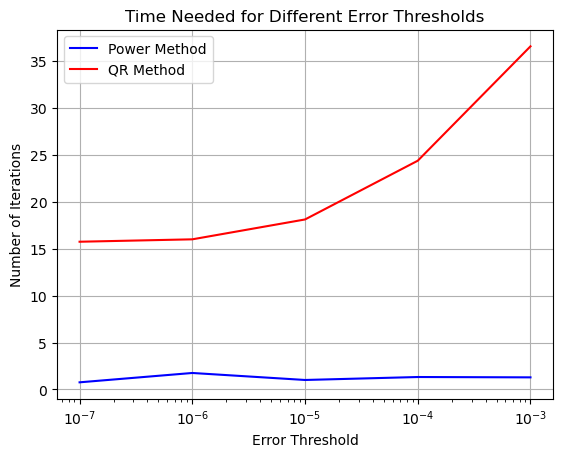

In [33]:
graph_comparison_time(A)

Comparing the methods can be challenging, the Power Method provides limited information by focusing on the dominant eigenvalue, while the QR Method finds all eigenvalues but requires more iterations and time, and again choose a fair criteria of stop can be difficult, and the characteristic polynomial method doesnt takes iterations, to summarize, I made the following table

| **Criteria**                   | **Characteristic Polynomial Method**       | **Power Method**                        | **QR Method**                             |
|--------------------------------|--------------------------------------------|-----------------------------------------|-------------------------------------------|
| **Type of Method**             | Direct (Algebraic)                        | Iterative                               | Iterative                                 |
| **Information Provided**       | All eigenvalues                           | Dominant eigenvalue and eigenvector     | All eigenvalues |
| **Iterations**                 | No iterations ( ignoring how calculate roots)                             | Yes, iterative                          | Yes, iterative                            |
| **Stopping Criteria**          | Not applicable                            | Norm difference between vectors      | Norm difference between matrices          |
| **Accuracy**                   | Limited for large matrices (numerical instability) | Limited (only dominant eigenvalue)      | High accuracy for all eigenvalues         |
| **Computational Efficiency**   | Efficient for small matrices              | Fast for dominant eigenvalue            | Slower due to QR decompositions           |
| **Suitability**                | Small matrices                            | Large matrices, dominant eigenvalue     | General-purpose, suitable for all eigenvalues |
| **Limitations**                | Impractical for large matrices            | Doesn't find all eigenvalues            | Computationally expensive                 |